In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset load
df = pd.read_csv("german_data_creditcard.csv")
df.head()

,Creditability,Acc_Bal_bin,Pay_Status_bin,Value_SavStock_bin,Length_Emp_bin,S&M_Status_bin,No_of_Credits_bin,Co_Credits_bin,Purpose_bin,Telephone_bin,Instalment_bin,Apartment_bin,Most_Val_Asset_bin,Duration_Credit,Credit_Amount,Age_bin
0,1,a. no account,c. no problem,"a. none, < 100 DM","a. Unemp, < 1 yr","a. M div, M single",a. 1,b. None,"a. used car, others",a. No,a. < 20,a. owner-occ / free,b. Savings / Car / Other,18,1049,a < 25 yr
1,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,9,2799,b. >= 25 yr
2,1,b. no balance,b. paid up,"a. none, < 100 DM",c. above 4 years,"a. M div, M single",a. 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,12,841,a < 25 yr
3,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,b. [20-25),a. owner-occ / free,c. No assets,12,2122,b. >= 25 yr
4,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,a. Other Banks or Dept Stores,"a. used car, others",a. No,a. < 20,b. rented flat,b. Savings / Car / Other,12,2171,b. >= 25 yr


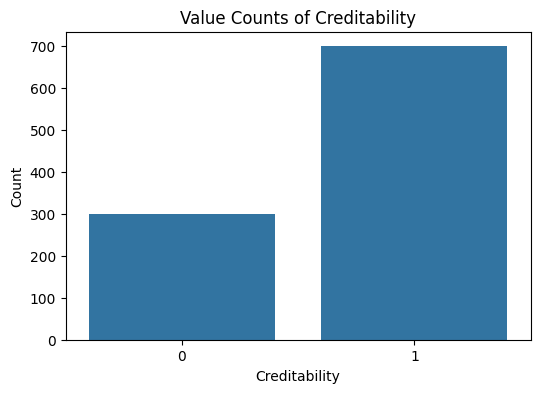

In [9]:
# counts of Creditability
plt.figure(figsize=(6, 4))
sns.countplot(x='Creditability', data=df)
plt.title('Value Counts of Creditability')
plt.xlabel('Creditability')
plt.ylabel('Count')
plt.show()

In [11]:
# splitting feature X and target  y

# Feature
X = df.drop('Creditability', axis=1)

# Target
y = df['Creditability']


# Train-Test Split is performed
# split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)

(700, 15) (300, 15)


In [12]:
# Categorical columns
cat_cols = X.columns.tolist()
cat_cols

['Acc_Bal_bin',
 'Pay_Status_bin',
 'Value_SavStock_bin',
 'Length_Emp_bin',
 'S&M_Status_bin',
 'No_of_Credits_bin',
 'Co_Credits_bin',
 'Purpose_bin',
 'Telephone_bin',
 'Instalment_bin',
 'Apartment_bin',
 'Most_Val_Asset_bin',
 'Duration_Credit',
 'Credit_Amount',
 'Age_bin']

In [13]:
# Preprocess data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Converting categorical values to binary  
preprocess = ColumnTransformer( transformers=[ ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols) ] )
preprocess

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. ``""{feature_na

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#RandomForestClassifier call
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [2, 5, 10, 15],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4]
}

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf)
])

# Gridsearch call with 5 fold CV and accuracy scoring

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)





In [47]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#fit the grid search on train data

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:")
print(grid.best_params_)

print("\nBest CV Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'rf__max_depth': 15, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

Best CV Accuracy: 0.7275

Test Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.18      0.31        60
           1       0.74      0.99      0.85       140

    accuracy                           0.75       200
   macro avg       0.83      0.59      0.58       200
weighted avg       0.79      0.75      0.68       200



In [48]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('rf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matri

In [49]:
# Access the fitted ColumnTransformer
ct = pipeline.named_steps["preprocess"]

# Extract the fitted OneHotEncoder
ohe = ct.named_transformers_["cat"]


In [ ]:
# Extract the fitted OneHotEncoder from the pipeline
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
encoded_feature_names = ohe.get_feature_names_out(cat_cols)

# Extract feature importances from the trained Random Forest
importances = pipeline.named_steps["rf"].feature_importances_

# Sort the features in descending
indices = importances.argsort()[::-1]


In [51]:
best_model = pipeline.fit(X_train, y_train)
ct = best_model.named_steps["preprocess"] 
ohe = ct.named_transformers_["cat"]
encoded_feature_names = ohe.get_feature_names_out(cat_cols)
rf_model = best_model.named_steps["rf"]
rf_model.estimators_[7]


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",'sqrt'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",415968276
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at th

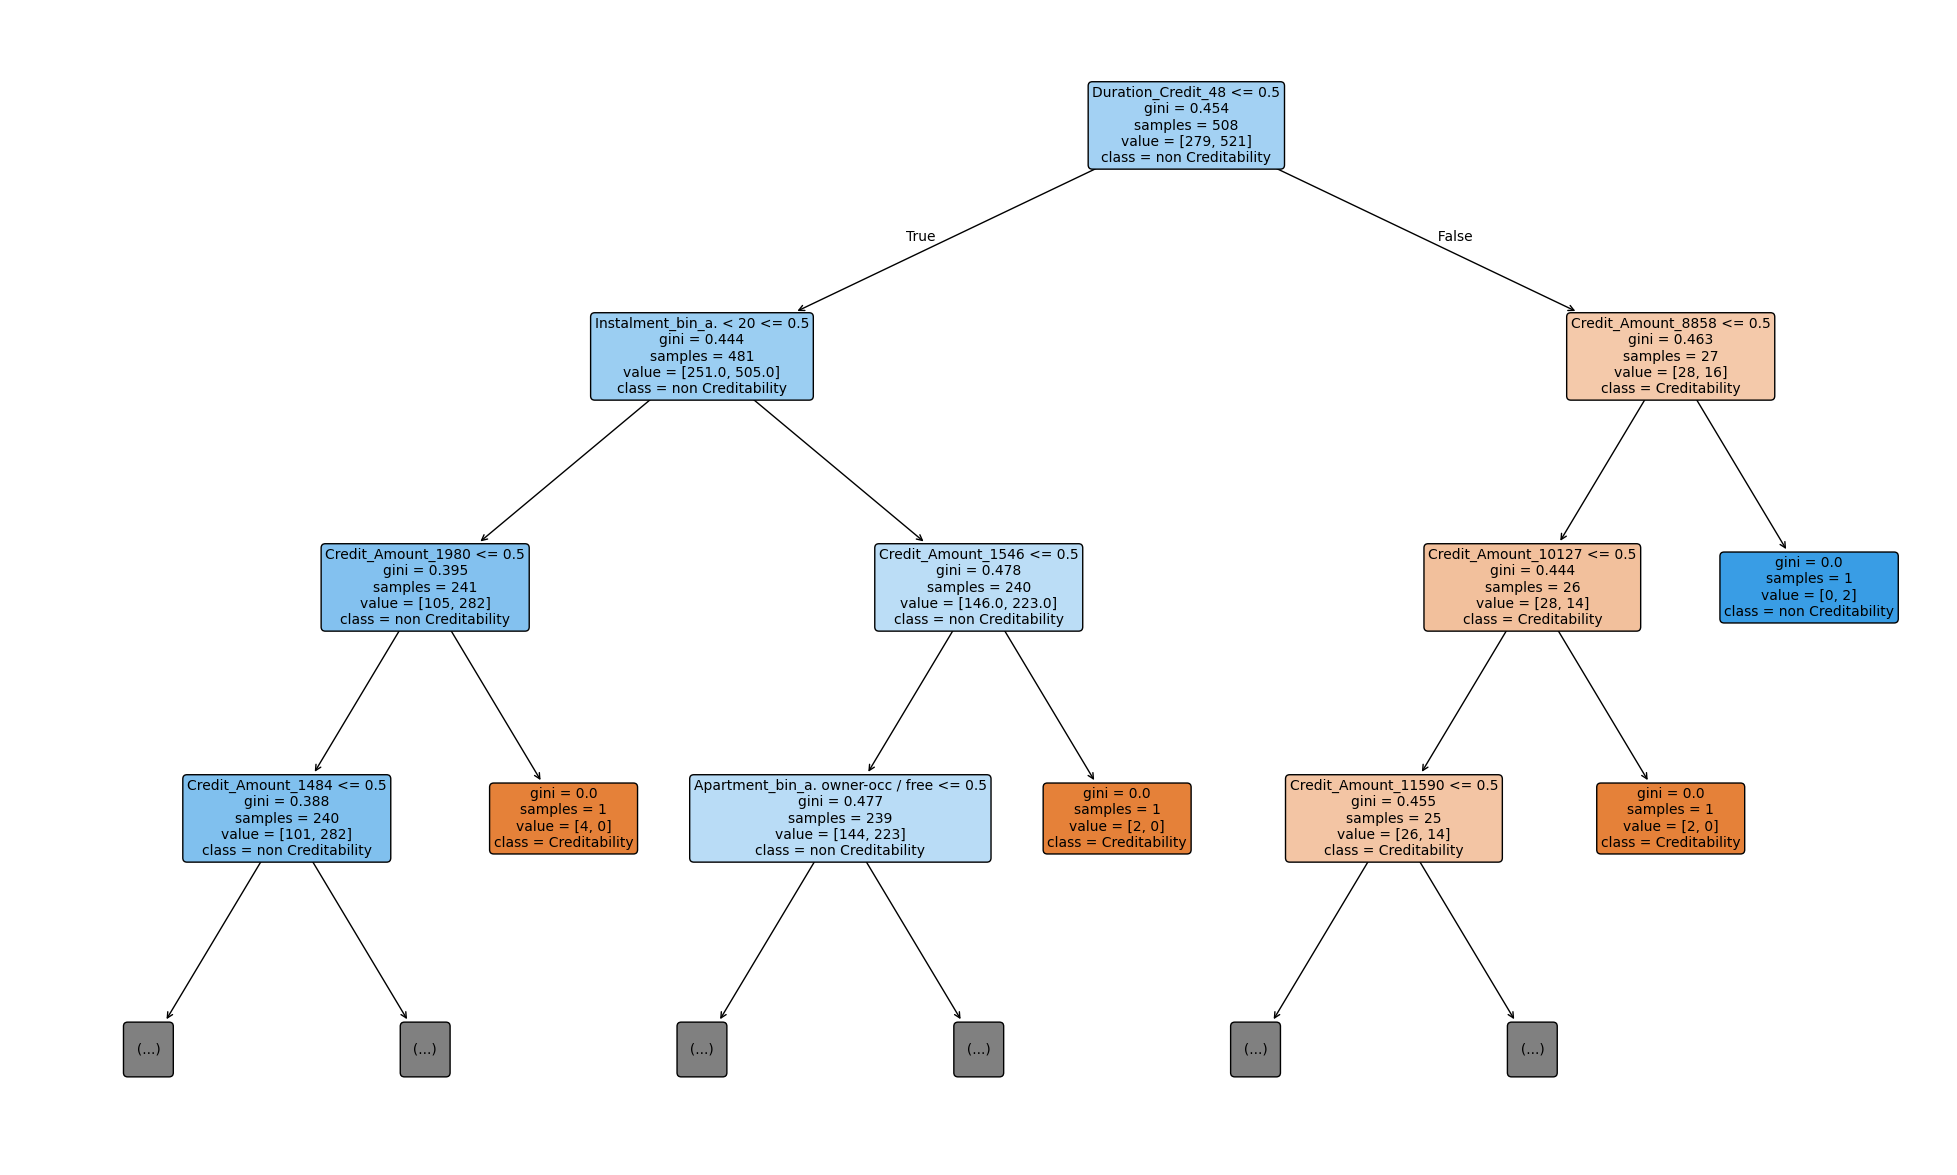

In [54]:
# Visualize a tree with high importance

tree_importances = [est.tree_.impurity[0] for est in rf_model.estimators_]
best_tree_index = np.argmax(tree_importances)

plt.figure(figsize=(25, 15))
plot_tree(
    rf_model.estimators_[best_tree_index],
    feature_names=encoded_feature_names,
    class_names=['Creditability', 'non Creditability'],
    max_depth=3,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()



The model achieved
Best CV Accuracy: 0.7275 - 
            this is an average accuracy across 5 folds during training.
            Data set is noisy but model able to learn meaningful patterns
Test Accuracy  - 0.75 - 
            This is slightly higher than CV accuracy and no overfitting
            Since classes are imbalanced this value alone can be misleading

Class 1(Good Creditability): 
            Based on Recall(0.99) value the model can identify every good customer
            Precision(0.74) is less so few bad customers can be labled as good

Class 0(Bad Creditability):
            Based on Recall(0.18) only 18% of bad customers are labeled
            Precision(0.92) says that if the model predicts bad customers then its mostly correct

HyperParameters:
n_estimators = 200 - 200 trees is often a good enough to reduce variance without excessive one hot encoding         computation

max_depth = 10 - depth of 10 prevents trees from growing too deep and overfitting
               - Without a depth limit, Random Forests can memorize all the training data especially with many categorical one‑hot encoding features

 rf__min_samples_split: 5 - This forces each split to have at least 5 samples
                            It reduces overly specific splits that fit noise, helps balance bias and variance


 rf__min_samples_leaf: 1 - Allows leaves to be pure when the data supports it

 Over all the model depicts high recall for good credibility and low recall for bad credibility. Accouracy of 0.75 is reasonable for credit scoring dataset. Random Forest model found a balanced configuration that avoids overfitting while capturing meaningful patterns. The model performs well on the most class but could be improved on detecting high risk customers well.